### Student Information
Name: Ei Kyi Phyu Khin

Student ID: 112065422

GitHub ID: EiKyiPhyuKhin

---

### Instructions

1. First: do the **take home** exercises in the [DM2023-Lab1-Master](https://github.com/fjrialdnc0615/DM2023-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2023-Lab1-Master](https://github.com/fjrialdnc0615/DM2023-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. You need to combine three labeled datasets into one file for your data preparation part.
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fjrialdnc0615/DM2023-Lab1-Master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 27th 11:59 pm, Thursday)__. 

In [1]:
### Begin Assignment Here

In [2]:
# TEST necessary for when working with external scripts
%load_ext autoreload
%autoreload 2

In [3]:
#Look how many sentences in each text file, 3 text file total = 3000
f1 = 'imdb_labelled.txt'
count = 0
with open(f1, "r") as f:
    for line in f:
        count += 1
print(count)

1000


2. Data Preparation

In [4]:
# Create a list of file names
files = ["amazon_cells_labelled.txt", "imdb_labelled.txt", "yelp_labelled.txt"]

# Create an empty string to store the combined text
combined_text = ""

# Loop through each file name
for file in files:
    # Open the file in read mode
    with open(file, "r") as f:
        # Read the file content and append it to the combined text
        combined_text += f.read()
        # Add a newline character to separate each file
        combined_text += "\n"

# Open a new file in write mode
with open("combined.txt", "w") as f:
    # Write the combined text to the new file
    f.write(combined_text)

In [5]:
print(combined_text)

So there is no way for me to plug it in here in the US unless I go by a converter.	0
Good case, Excellent value.	1
Great for the jawbone.	1
Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!	0
The mic is great.	1
I have to jiggle the plug to get it to line up right to get decent volume.	0
If you have several dozen or several hundred contacts, then imagine the fun of sending each of them one by one.	0
If you are Razr owner...you must have this!	1
Needless to say, I wasted my money.	0
What a waste of money and time!.	0
And the sound quality is great.	1
He was very impressed when going from the original battery to the extended battery.	1
If the two were seperated by a mere 5+ ft I started to notice excessive static and garbled sound from the headset.	0
Very good quality though	1
The design is very odd, as the ear "clip" is not very comfortable at all.	0
Highly recommend for any one who has a blue tooth phone.	1
I advise EVERYONE DO NOT BE FOOLED!	0
So Far So G

3. Data Transformation

In [6]:
import pandas as pd
import helpers.data_mining_helpers as dmh

sentences, scores = dmh.format_rows_forHW('combined.txt')

data = {'sentence': sentences, 'score': scores}
df = pd.DataFrame(data)
print(df.shape) #has 3000 rows and 2 cols, combined 3 text files, each one has 1000 rows


(3000, 2)


In [7]:
print(df.head(5)) #show first 5 rows
print(df.describe()) #description of dataframe

                                            sentence score
0  So there is no way for me to plug it in here i...     0
1                        Good case, Excellent value.     1
2                             Great for the jawbone.     1
3  Tied to charger for conversations lasting more...     0
4                                  The mic is great.     1
            sentence score
count           3000  3000
unique          2983     2
top     Great phone.     0
freq               2  1500


### ** >>> Exercise 1 (5 min): **  
In this exercise, please print out the *text* data for the first three samples in the dataset. (See the above code for help)

In [8]:
for t in df["sentence"][:3]:
    print(t)

So there is no way for me to plug it in here in the US unless I go by a converter.
Good case, Excellent value.
Great for the jawbone.


In [9]:
df[:10][["sentence","score"]]

,sentence,score
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1
5,I have to jiggle the plug to get it to line up...,0
6,If you have several dozen or several hundred c...,0
7,If you are Razr owner...you must have this!,1
8,"Needless to say, I wasted my money.",0
9,What a waste of money and time!.,0


In [10]:
df.loc[df['score'] == '0'] #return last 10 rows, here we have to use '0' string to get the result

,sentence,score
0,So there is no way for me to plug it in here i...,0
3,Tied to charger for conversations lasting more...,0
5,I have to jiggle the plug to get it to line up...,0
6,If you have several dozen or several hundred c...,0
8,"Needless to say, I wasted my money.",0
...,...,...
2995,I think food should have flavor and texture an...,0
2996,Appetite instantly gone.,0
2997,Overall I was not impressed and would not go b...,0
2998,"The whole experience was underwhelming, and I ...",0


In [11]:
#since the values of the score column are string, we will convert it to the int type to be used it more efficiently
df['score'] = df['score'].astype(int)
df.loc[df['score'] == 0] #we can use 0 integer to get the result

,sentence,score
0,So there is no way for me to plug it in here i...,0
3,Tied to charger for conversations lasting more...,0
5,I have to jiggle the plug to get it to line up...,0
6,If you have several dozen or several hundred c...,0
8,"Needless to say, I wasted my money.",0
...,...,...
2995,I think food should have flavor and texture an...,0
2996,Appetite instantly gone.,0
2997,Overall I was not impressed and would not go b...,0
2998,"The whole experience was underwhelming, and I ...",0


In [12]:
# using loc (by label)
df.loc[:10, 'score'] #has 11 rows

0     0
1     1
2     1
3     0
4     1
5     0
6     0
7     1
8     0
9     0
10    1
Name: score, dtype: int64

In [13]:
# using iloc (by position)
df.iloc[:10, 0] #For second parameter, if u want to show sentence: write 0, score: 1

0    So there is no way for me to plug it in here i...
1                          Good case, Excellent value.
2                               Great for the jawbone.
3    Tied to charger for conversations lasting more...
4                                    The mic is great.
5    I have to jiggle the plug to get it to line up...
6    If you have several dozen or several hundred c...
7          If you are Razr owner...you must have this!
8                  Needless to say, I wasted my money.
9                     What a waste of money and time!.
Name: sentence, dtype: object

 
Try to fetch records belonging to the ```1``` score, and query every 10th record. Only show the first 10 records.

In [14]:
# Answer here
df[df['score'] == 1].iloc[::10][0:10] #...[::10][0:10] or [::10].head(10)

,sentence,score
1,"Good case, Excellent value.",1
21,I bought this to use with my Kindle Fire and a...,1
44,Excellent bluetooth headset.,1
61,I really recommend this faceplates since it lo...,1
78,"I love this phone , It is very handy and has a...",1
98,Best I've found so far .... I've tried 2 other...,1
114,Absolutely great.,1
130,It is so small and you don't even realize that...,1
155,This phone is very fast with sending any kind ...,1
173,The iGo chargers and tips are really great.,1


## 4. Data Mining using Pandas
### 4.1 Missing Values

In [15]:
# check missing values
print(df.isnull())
print(df.isnull().apply(lambda x: dmh.check_missing_values(x)))


      sentence  score
0        False  False
1        False  False
2        False  False
3        False  False
4        False  False
...        ...    ...
2995     False  False
2996     False  False
2997     False  False
2998     False  False
2999     False  False

[3000 rows x 2 columns]
                             sentence                               score
0  The amoung of missing records is:   The amoung of missing records is: 
1                                   0                                   0


In [16]:
#we can also use this to check the total misssing value
df.isna().sum()

sentence    0
score       0
dtype: int64

Try to calculate the missing values in every record instead of every column.  

In [17]:
# Answer here
df.isnull().apply(lambda x: dmh.check_missing_values(x), axis = 1)

0       (The amoung of missing records is: , 0)
1       (The amoung of missing records is: , 0)
2       (The amoung of missing records is: , 0)
3       (The amoung of missing records is: , 0)
4       (The amoung of missing records is: , 0)
                         ...                   
2995    (The amoung of missing records is: , 0)
2996    (The amoung of missing records is: , 0)
2997    (The amoung of missing records is: , 0)
2998    (The amoung of missing records is: , 0)
2999    (The amoung of missing records is: , 0)
Length: 3000, dtype: object

### 4.2 Dealing with Duplicate Data


In [18]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2995    False
2996    False
2997    False
2998    False
2999    False
Length: 3000, dtype: bool

In [19]:
#check the sum of the duplicate value
sum(df.duplicated())

17

In [20]:
sum(df.duplicated(subset=['sentence','score']))

17

In [21]:
#drop duplicates
df.drop_duplicates(subset=['sentence','score'], keep='first', inplace=True) # inplace applies changes directly on our dataframe

In [22]:
len(df)

2983

## 5.  Data Preprocessing


### 5.1 Sampling


In [23]:
print(df.shape)
df_sample = df.sample(n=300,random_state=42) #random state
display(df_sample)
print("len of df_sample: ", len(df_sample))

(2983, 2)


,sentence,score
2423,We've tried to like this place but after 10+ t...,0
1558,The script is a big flawed mess.,0
889,It was that loud.Glad to say that the Plantron...,1
332,The reception is excellent!,1
1850,Now imagine that every single one of those dec...,0
...,...,...
239,Do not make the same mistake as me.,0
538,The eargels channel the sound directly into yo...,1
697,It doesn't make you look cool.,0
1081,This if the first movie I've given a 10 to in ...,1


len of df_sample:  300


In [24]:
print(df_sample[0:5])

                                               sentence  score
2423  We've tried to like this place but after 10+ t...      0
1558                 The script is a big flawed mess.        0
889   It was that loud.Glad to say that the Plantron...      1
332                         The reception is excellent!      1
1850  Now imagine that every single one of those dec...      0


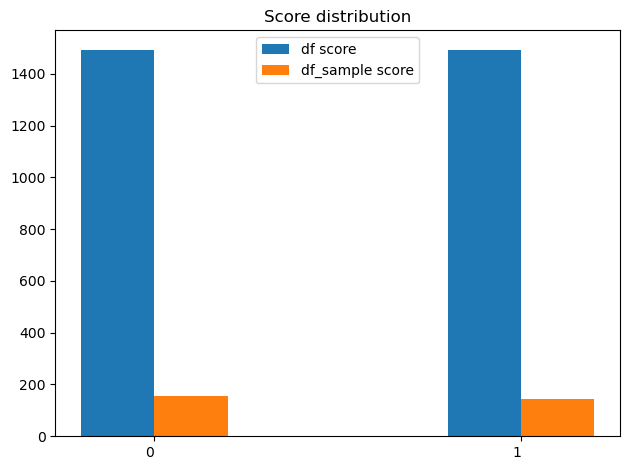

In [25]:
#compare df and df_sample score distribution
import pandas as pd
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
width = 0.2


# Calculate the x positions for the bars
x = range(len(df['score'].unique()))

# Plot the bars for df
ax.bar(x, df['score'].value_counts(), width, label='df score')

# Calculate the x positions for the bars in df_sample
x_sample = [i + width for i in x]

# Plot the bars for df_sample
ax.bar(x_sample, df_sample['score'].value_counts(), width, label='df_sample score')

score = list(df['score'].unique())

ax.set_xticks([i + width/2 for i in x])
ax.set_xticklabels(score, rotation=0, ha="right")

#ax.grid(which='both') # to get better visualization

ax.set_title('Score distribution')

ax.legend(loc = 'upper center')

plt.tight_layout()
plt.show()


Percentage of Sentiment Score:


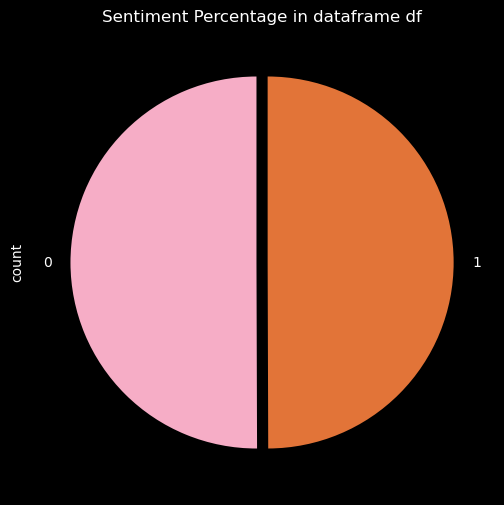

In [26]:
import matplotlib.pyplot as plt
import pandas as pd

#We will look at the sentiment 0/1, which one has how many percent, etc.
print("Percentage of Sentiment Score:")
plt.style.use('dark_background')

# Plot the pie chart
df.score.value_counts().plot(kind='pie',               
                                   shadow=False, 
                                   startangle=90, 
                                   pctdistance=0.75,
                                   explode = (0.03,0.03),
                                   colors = ['#F6ADC6','#E27438'],
                                   figsize=(6, 7))
plt.title('Sentiment Percentage in dataframe df')
plt.show()

In [27]:
import nltk 

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /Users/bella/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

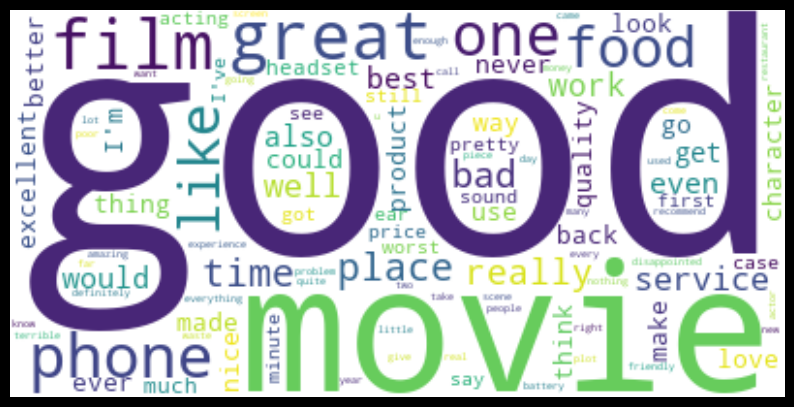

In [28]:
import wordcloud 
import nltk

#for sentence column, to know which words are most included in dataframe, we will use wordcloud 
text = " ".join(sentence for sentence in df.sentence)

wordcloud = wordcloud.WordCloud(max_font_size=200, max_words=100, background_color="white", stopwords= nltk.corpus.stopwords.words("english")).generate(text)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### Preprocessing Data

In [29]:
import re
from nltk.corpus import stopwords

def preprocessingData(txt):
    
    # Remove non-letters
    txt = re.sub("[^a-zA-Z]", " ", txt)
    
    # Lower case
    txt = txt.lower()
    
    # Tokenize to each word.
    token = nltk.word_tokenize(txt)

    #remove stop words
    txt = [w for w in txt if not w in set(stopwords.words("english"))]
    
    # Stemming
    txt = [nltk.stem.SnowballStemmer('english').stem(w) for w in token]

    # Join the words back into one string separated by space, and return the result.
    return " ".join(txt)
    

In [30]:
import nltk

text = []
for i in df['sentence']:
    t = preprocessingData(i)
    text.append(t)

df['cleaned_sentence'] = text

In [31]:
print(df['sentence'][:10])
print('---------------------------------------------------------')
print(df['cleaned_sentence'][:10])

0    So there is no way for me to plug it in here i...
1                          Good case, Excellent value.
2                               Great for the jawbone.
3    Tied to charger for conversations lasting more...
4                                    The mic is great.
5    I have to jiggle the plug to get it to line up...
6    If you have several dozen or several hundred c...
7          If you are Razr owner...you must have this!
8                  Needless to say, I wasted my money.
9                     What a waste of money and time!.
Name: sentence, dtype: object
---------------------------------------------------------
0    so there is no way for me to plug it in here i...
1                                 good case excel valu
2                                 great for the jawbon
3    tie to charger for convers last more than minu...
4                                     the mic is great
5    i have to jiggl the plug to get it to line up ...
6    if you have sever dozen or 

### 5.3 Feature subset selection

![alt txt](https://docs.google.com/drawings/d/e/2PACX-1vS01RrtPHS3r1Lf8UjX4POgDol-lVF4JAbjXM3SAOU-dOe-MqUdaEMWwJEPk9TtiUvcoSqTeE--lNep/pub?w=748&h=366)

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import BernoulliNB
from nltk.corpus import words
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve

### 1) Use CountVectorizer

In [33]:
# Split data into training and testing sets
X = df['cleaned_sentence']
y = df['score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
# Word frequency feature extraction
count_vectorizer = CountVectorizer(max_features=5000)  # You can adjust max_features as needed
X_train_count = count_vectorizer.fit_transform(X_train)
X_test_count = count_vectorizer.transform(X_test)


In [35]:
# Train a Naive Bayes classifier
bnb_classifier = BernoulliNB()
bnb_classifier.fit(X_train_count, y_train)


BernoulliNB()

In [36]:
# Predict sentiment
y_pred = bnb_classifier.predict(X_test_count)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(report)


Accuracy: 0.83
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       307
           1       0.82      0.82      0.82       290

    accuracy                           0.83       597
   macro avg       0.83      0.83      0.83       597
weighted avg       0.83      0.83      0.83       597



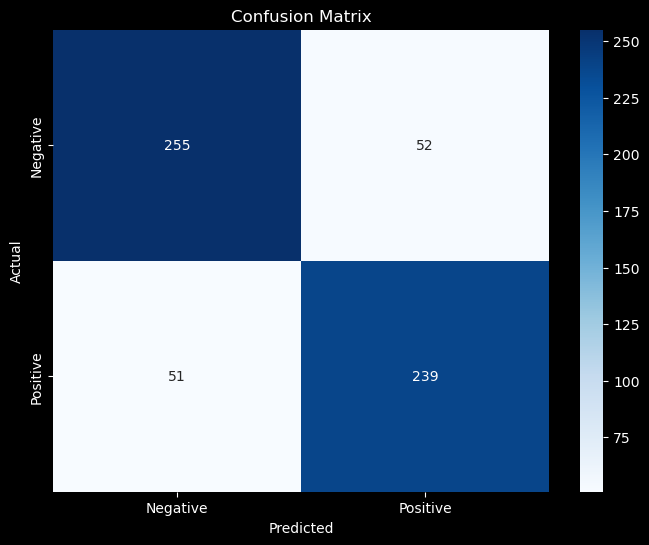

In [37]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


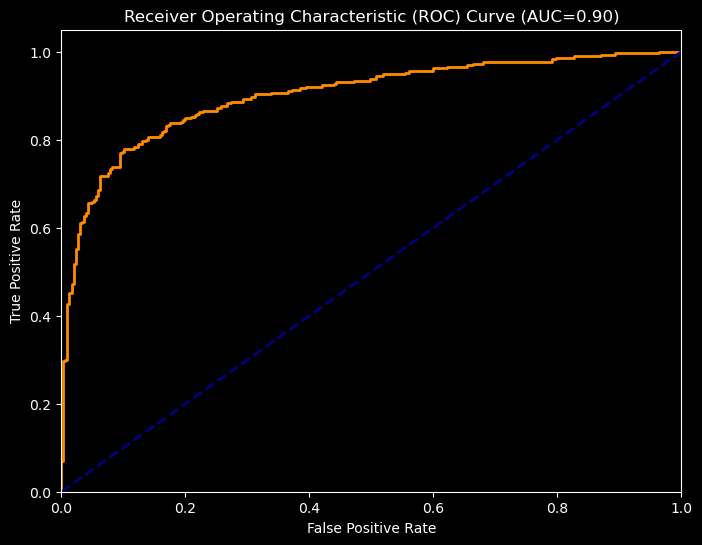

              precision    recall  f1-score   support

    Negative       0.83      0.83      0.83       307
    Positive       0.82      0.82      0.82       290

    accuracy                           0.83       597
   macro avg       0.83      0.83      0.83       597
weighted avg       0.83      0.83      0.83       597



In [40]:
# Predict sentiment
y_pred = bnb_classifier.predict(X_test_count)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, bnb_classifier.predict_proba(X_test_count)[:, 1])

# Calculate the AUC (Area Under the Curve)
roc_auc = roc_auc_score(y_test, bnb_classifier.predict_proba(X_test_count)[:, 1])

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'Receiver Operating Characteristic (ROC) Curve (AUC={roc_auc:.2f})')
plt.show()

# Print classification report
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred, target_names=["Negative", "Positive"])
print(report)


#############################################################################

### 2) Use TF-IDF

In [ ]:
# Split data into training and testing sets
X = df['cleaned_sentence']
y = df['score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
# TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [ ]:
# Train a Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train)


MultinomialNB()

In [ ]:
# Predict sentiment
y_pred = nb_classifier.predict(X_test_tfidf.toarray())  # Convert the TF-IDF test data to a dense matrix

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(report)


Accuracy: 0.83
              precision    recall  f1-score   support

           0       0.84      0.83      0.83       377
           1       0.83      0.83      0.83       369

    accuracy                           0.83       746
   macro avg       0.83      0.83      0.83       746
weighted avg       0.83      0.83      0.83       746



Accuracy: 0.83 - model correctly predicted the sentiment (positive 1 or negative 0) for approximately 83% of the test data. 
Precision: 
-> For class 0 (negative sentiment), precision is 0.85. This means that out of all the reviews the model predicted as negative, 85% of them were actually negative. 
-> For class 1 (positive sentiment), precision is 0.81. This means that out of all the reviews the model predicted as positive, 81% of them were actually positive. 

Recall: 
-> For class 0 (negative sentiment), recall is 0.81. This means that out of all the actual negative reviews, the model correctly identified 81% of them as negative. 
-> For class 1 (positive sentiment), recall is 0.85. This means that out of all the actual positive reviews, the model correctly identified 85% of them as positive. 
F1-Score: The F1-score is a balance between precision and recall. In this case, both class 0 and class 1 have an F1-score of 0.83, indicating a good balance between precision and recall for both classes. 
Support: For class 0, there are 307 reviews in the test set. For class 1, there are 290 reviews in the test set. 

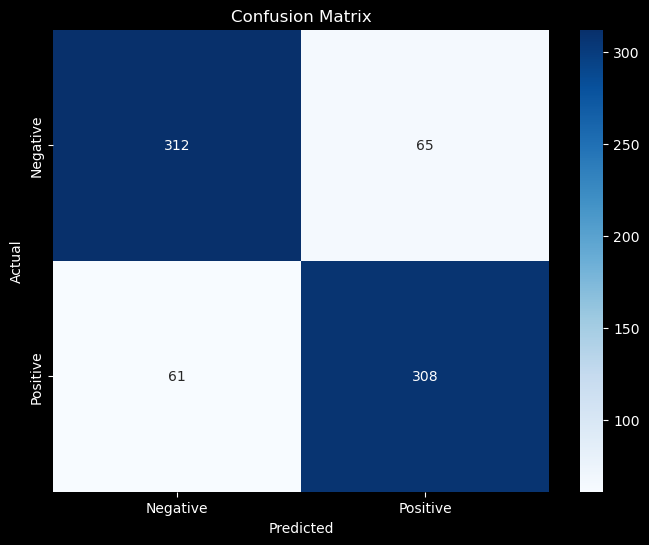

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


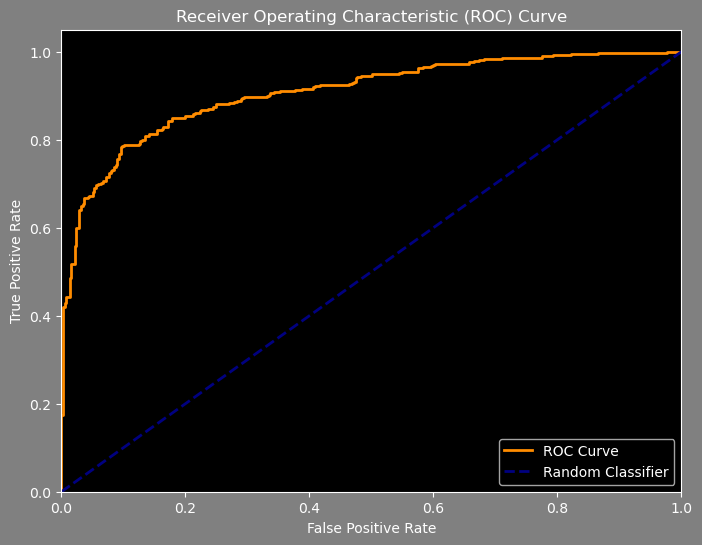

AUC: 0.91


'In a binary classification task, a random classifier has an equal chance of classifying a data point as either positive or negative. \nThe diagonal line is the expected result when classification decisions are made at random. \nA good classifier should have an ROC curve that is well above this diagonal line.'

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, nb_classifier.predict_proba(X_test_tfidf)[:, 1])

# Plot the ROC curve
plt.figure(figsize=(8, 6), facecolor='gray')
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC Curve')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Calculate the AUC (Area Under the Curve)
roc_auc = roc_auc_score(y_test, nb_classifier.predict_proba(X_test_tfidf)[:, 1])
print(f"AUC: {roc_auc:.2f}")

'''In a binary classification task, a random classifier has an equal chance of classifying a data point as either positive or negative. 
The diagonal line is the expected result when classification decisions are made at random. 
A good classifier should have an ROC curve that is well above this diagonal line.'''

### Difference Between CountVectorizer and TF-IDF 

Count Vectorization counts the occurrences of each word in a document. It focus on the significance of appearing words and may not give enough weight to rare but significant words. This technique effectively captures the presence of words.

TF IDF (Term Frequency Inverse Document Frequency) considers both the frequency of a term (word occurrence) and its importance, across the corpus. It emphasizes the importance of words that're frequent in a document but rare in the overall corpus. It effectively captures the significance of words within a document.

To conclude, TF-IDF is generally preferred for tasks like sentiment analysis and text classification as it combines both word presence and importance making it more suitable for identifying features. However, Count Vectorization can still be valuable particularly when we want to focus on capturing word presence without considering their importance. 
